# Sales Prediction using Python (Task 4)

In [5]:
# Let's Import all the necessory Librarys for our project
# Such as numpy, pandas, matplotlib, seaborn

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Now let's import the file in which data is saved
data = pd.read_csv("Advertising.csv")

In [18]:
# view first 5 rows of our data
data.head()

,sr no,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [19]:
# let's find out that is there any missing value
data.isnull().sum()

sr no        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [20]:
# To check total count, mean, median of every variable given to us
data.describe()

,sr no,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [21]:
# To chech data type of every characteristic (variable)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sr no      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


There is no any object data type value, so we can continue now

In [22]:
# To split the data into x and y
x = data[['TV', 'Radio', 'Newspaper']] #    x = All Independent variables
y = data['Sales'] #    y = Dependent variable


In [23]:
# Let's check sepration of x and y is succeed or not
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [24]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

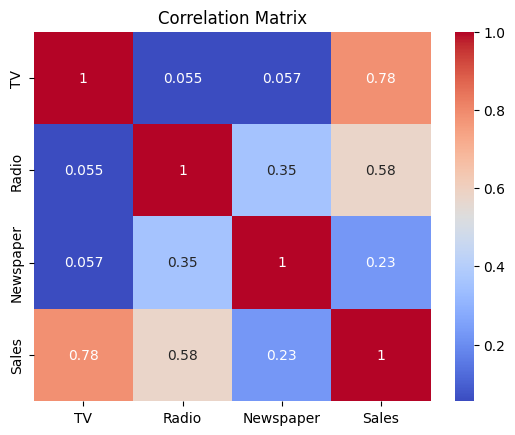

In [25]:
# To draw correlation matrics for visualising the relationship od every variable with each other
data_for_heatmap = data.drop(["sr no"],axis=1)
cm=data_for_heatmap.corr() 
sns.heatmap(cm,annot=True,cmap='coolwarm') 
plt.title("Correlation Matrix") 
plt.show()

# By observing above correlation matrics we can say that out of all independent variables there is major impact of TV on Sales (dependent variable)


In [26]:
# Now let us split the data horizontally in training data and testing data by trsin_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=34, test_size=0.2)

# Linear Regression 

In [27]:
# TO apply/fit linear regression model on our data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [28]:
# let's predict the value of dependent variable with the help of independent testing data
lin_y_pred = lin_reg.predict(x_test)

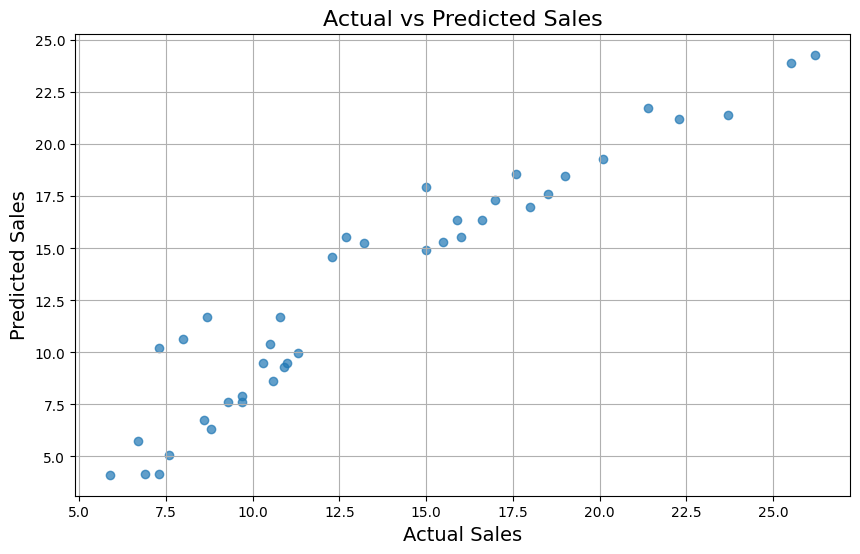

In [29]:
# To visualise the relation between original sales (y_test) and predicted sales (lin_y_pred)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lin_y_pred, alpha=0.7)
plt.title('Actual vs Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.grid(True)
plt.show()


In [30]:
# Now to check fitness of our model with the help of R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, lin_y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.8925087896627704


# Random Forest Regression

In [31]:
# TO apply/fit Random Forest Regression model on our data
from sklearn.ensemble import RandomForestRegressor
model_rand = RandomForestRegressor()
model_rand.fit(x_train, y_train)


RandomForestRegressor()

In [32]:
# let's predict the value of dependent variable with the help of independent testing data
rand_y_pred = model_rand.predict(x_test)

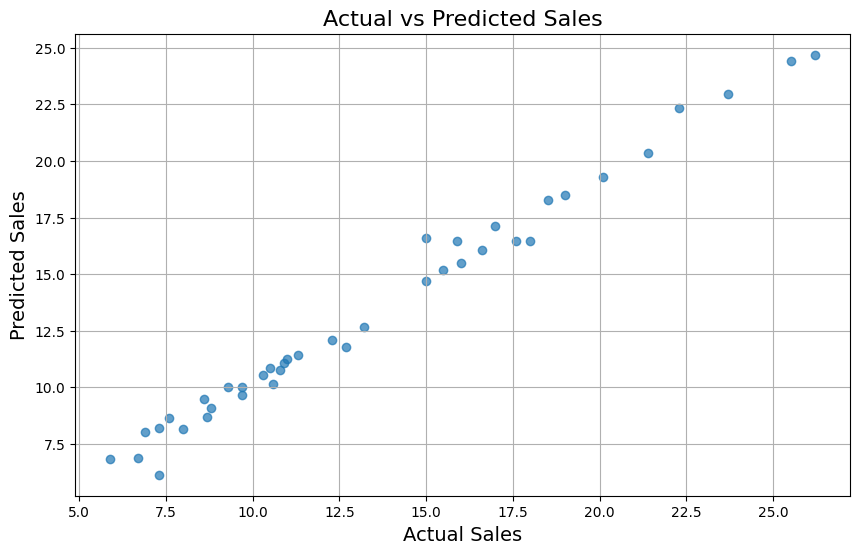

In [33]:
# To visualise the relation between original sales (y_test) and predicted sales (rand_y_pred)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rand_y_pred, alpha=0.7)
plt.title('Actual vs Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.grid(True)
plt.show()


In [34]:
# Now to check fitness of our model with the help of R2 score
from sklearn.metrics import r2_score
rand_r2 = r2_score(y_test, rand_y_pred)
print("R-squared Score:", rand_r2)

R-squared Score: 0.9813231224489282


# Here we applyed 2 Regression models, out of them Random Forest Regression have maximum r2 score (0.9826542921167404)
# So now we are ready to use this model for Sales Prediction